<a href="https://colab.research.google.com/github/16sumanshiroy/Parkinson-PM/blob/main/PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn
import numpy as np
import pandas as pd
import warnings
import imblearn
import seaborn as sb
from sklearn import svm
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from math import sqrt
from scipy.stats import mode

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
data=pd.read_csv("parkinsons.data")
X = data.loc[:,~data.columns.isin(['name','status'])]
y = data.loc[:,'status']
data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_b=X #for data without any preprocessing
y_b=y

In [ ]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
data.info(),
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

(195, 24)

In [ ]:
print(data.isna().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


#DATA VISUALIZATION
##UNIVARIATE ANALYSIS
The measures of vocal fundamental frequency are shown above. There is a positive skewness for minimum vocal fundamental frequency with more high values between 75Hz and 125Hhz. The average vocal frequency is almost normally distributed with more values ranging 115Hz and 130Hz. The high vocal frequency does not have any skewness, but some range of values are at the right most tail.

<ipython-input-9-e0256340bee5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['MDVP:Flo(Hz)'],ax=ax[0])
<ipython-input-9-e0256340bee5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['MDVP:Fo(Hz)'],ax=ax[1])
<ipython-input-9-e0256340bee5>:4: UserWarning: 

`distplot` is a deprecated f

<Axes: xlabel='MDVP:Fhi(Hz)', ylabel='Density'>

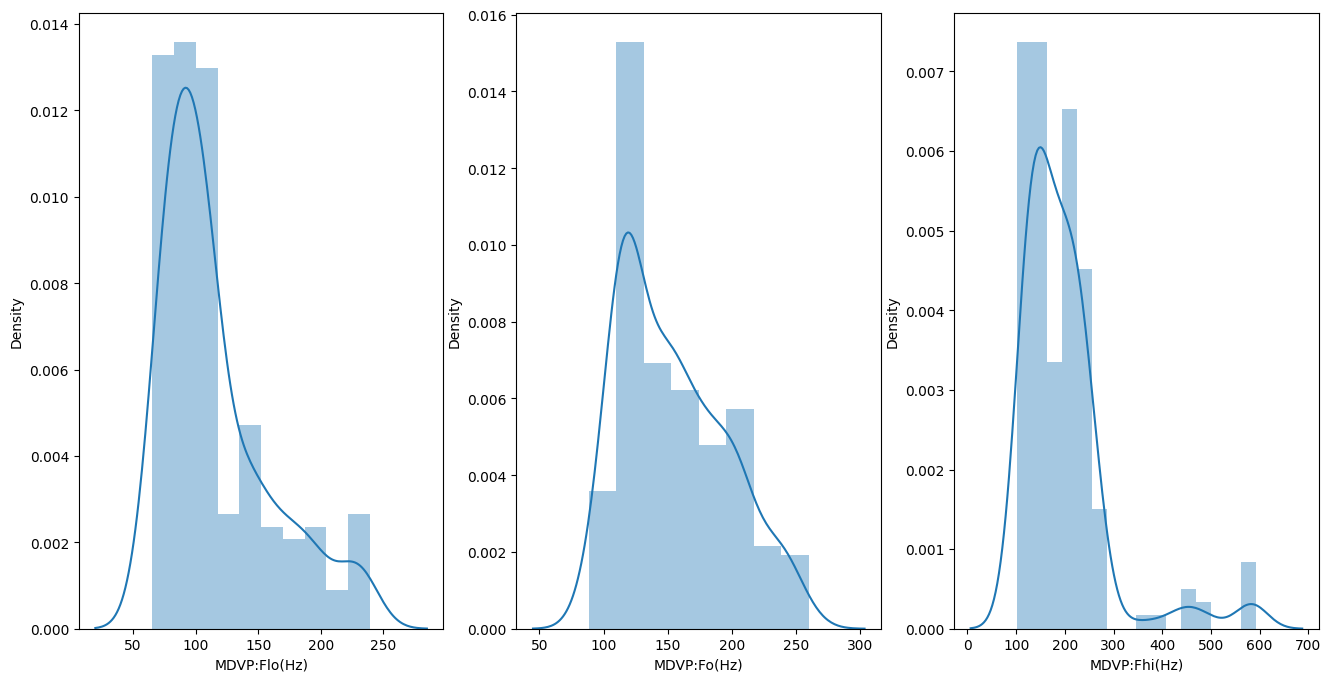

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(16,8))
sb.distplot(data['MDVP:Flo(Hz)'],ax=ax[0])
sb.distplot(data['MDVP:Fo(Hz)'],ax=ax[1])
sb.distplot(data['MDVP:Fhi(Hz)'],ax=ax[2])

<ipython-input-10-e4fcb661de78>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['MDVP:Shimmer'],ax=ax[0,0])
<ipython-input-10-e4fcb661de78>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['MDVP:Shimmer(dB)'],ax=ax[0,1])
<ipython-input-10-e4fcb661de78>:4: UserWarning: 

`distplot` is a 

<Axes: xlabel='Shimmer:DDA', ylabel='Density'>

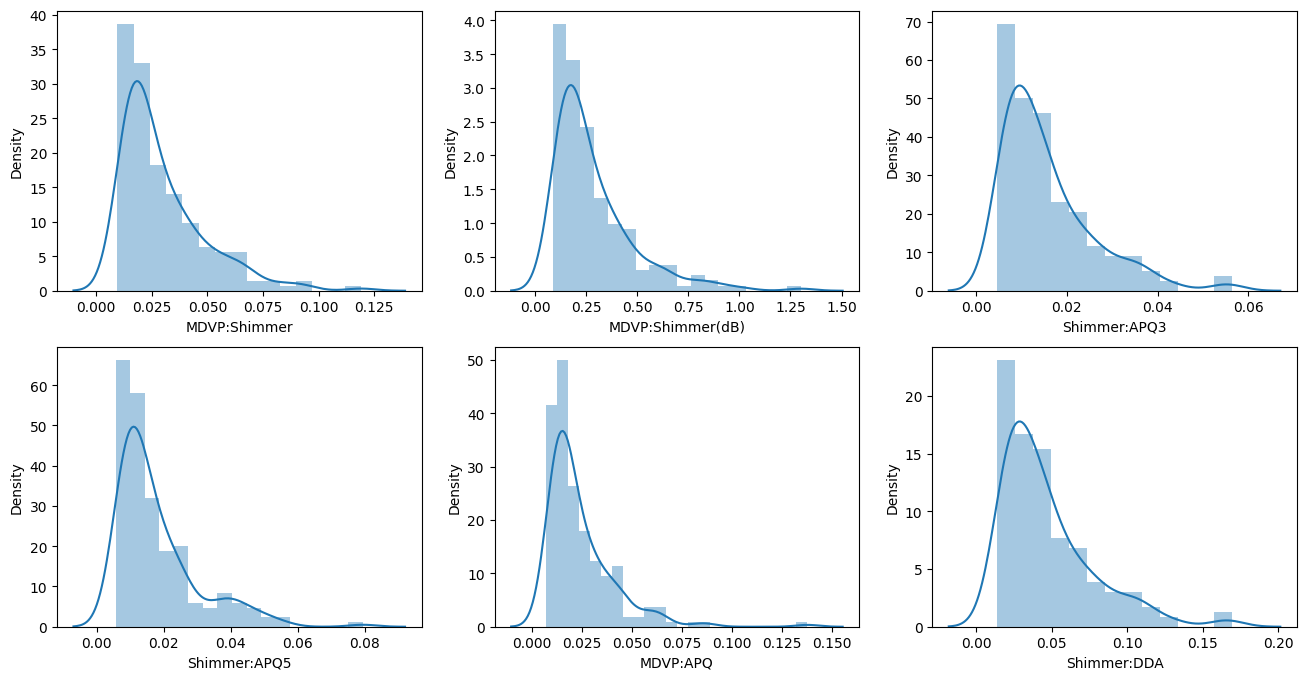

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(16,8))
sb.distplot(data['MDVP:Shimmer'],ax=ax[0,0])
sb.distplot(data['MDVP:Shimmer(dB)'],ax=ax[0,1])
sb.distplot(data['Shimmer:APQ3'],ax=ax[0,2])
sb.distplot(data['Shimmer:APQ5'],ax=ax[1,0])
sb.distplot(data['MDVP:APQ'],ax=ax[1,1])
sb.distplot(data['Shimmer:DDA'],ax=ax[1,2])

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


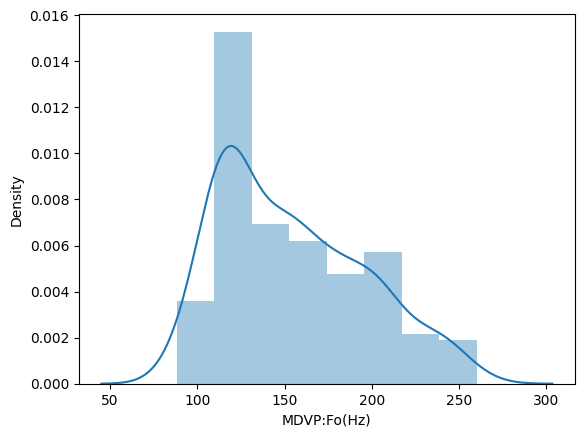

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


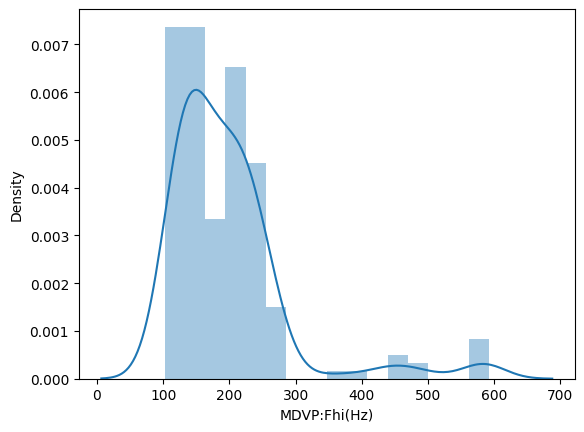

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


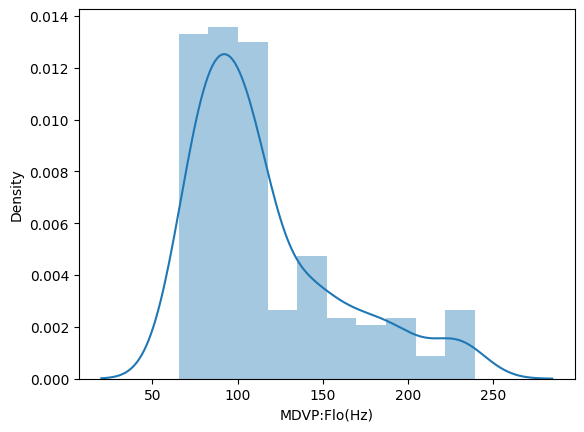

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


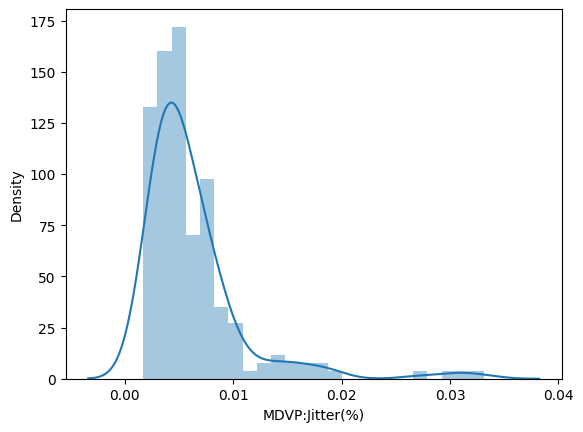

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


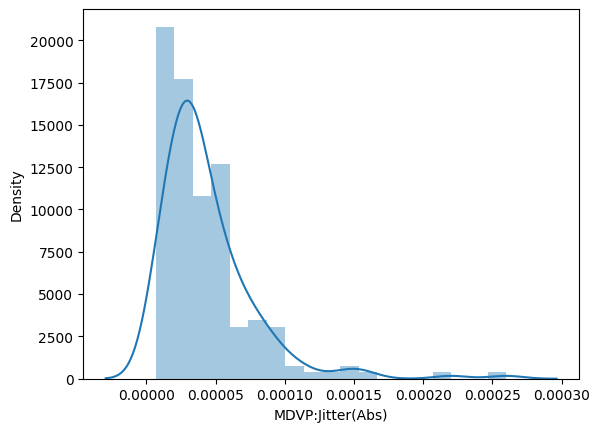

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


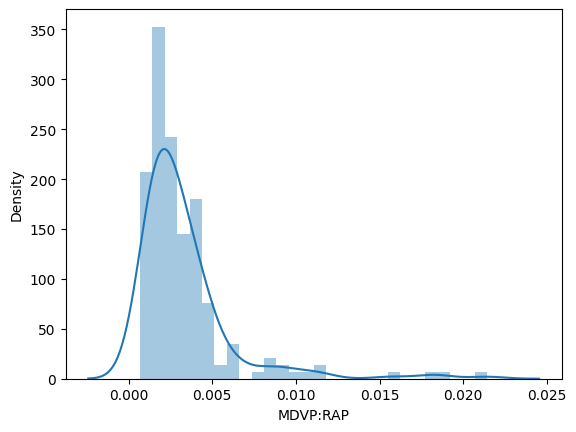

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


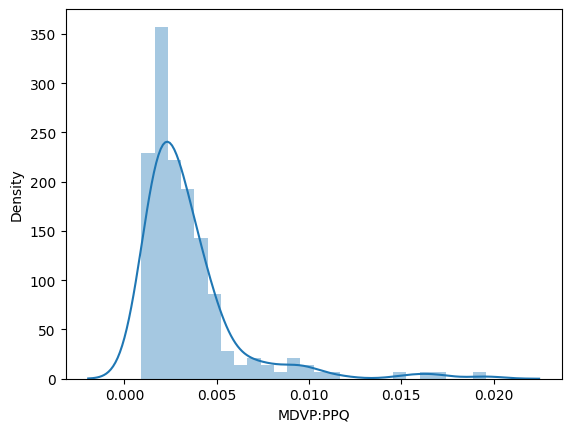

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


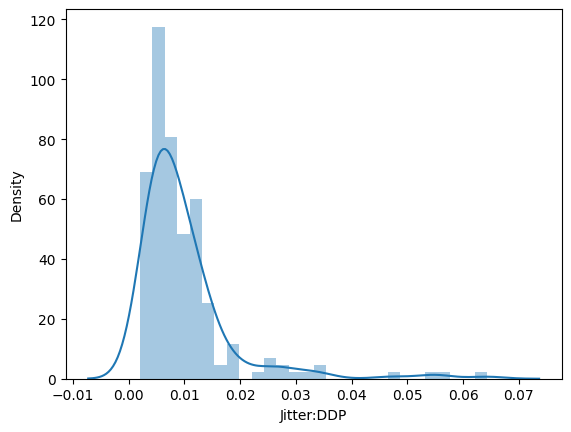

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


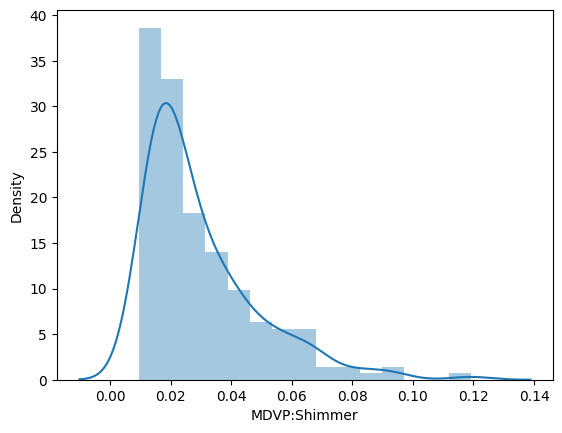

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


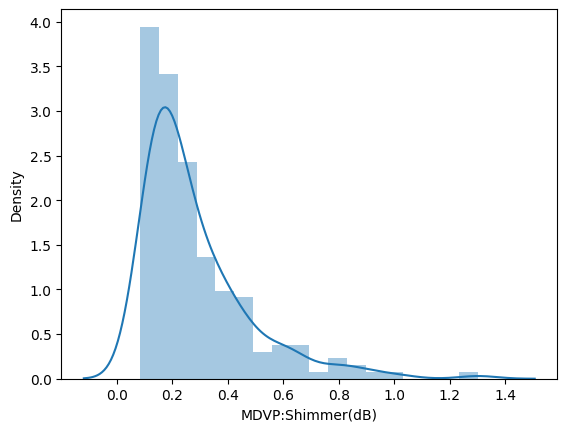

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


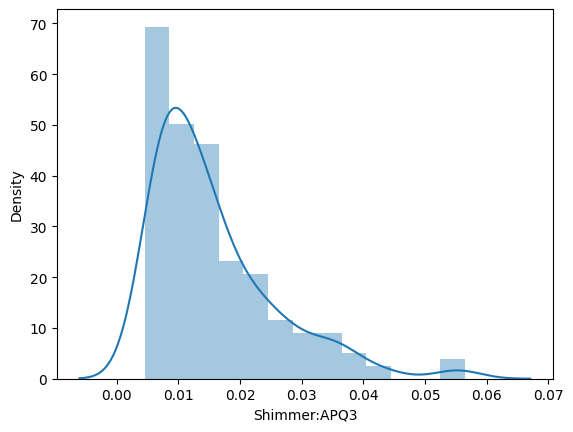

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


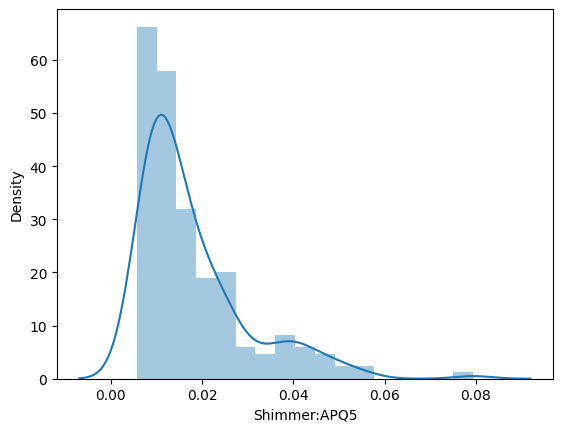

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


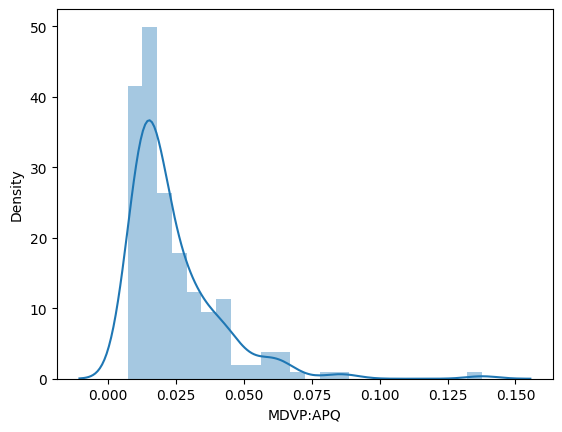

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


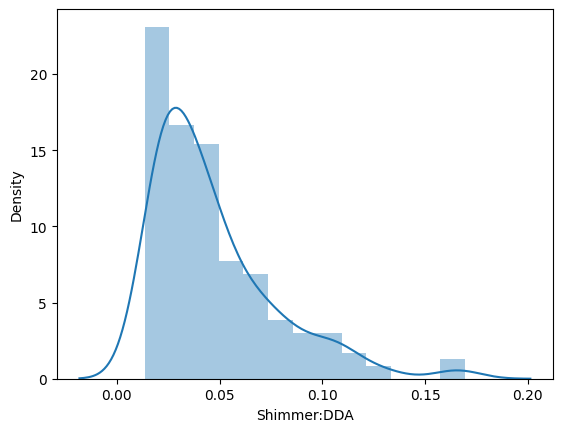

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


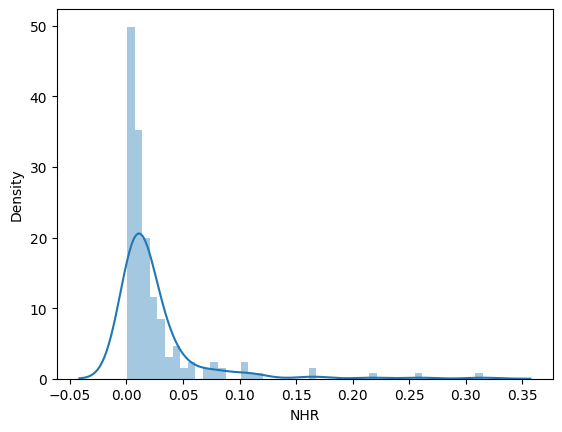

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


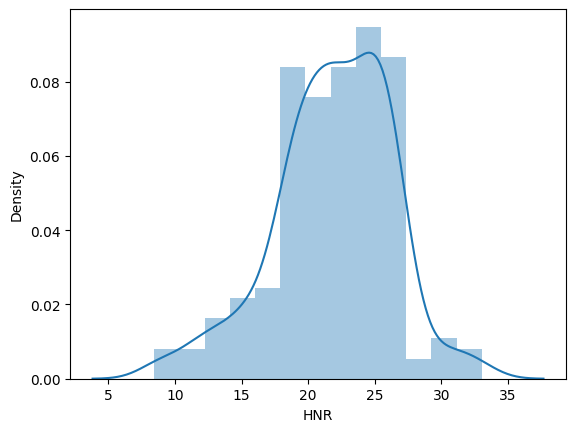

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


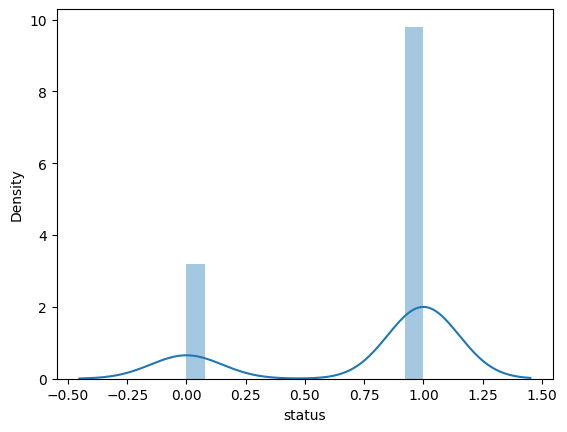

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


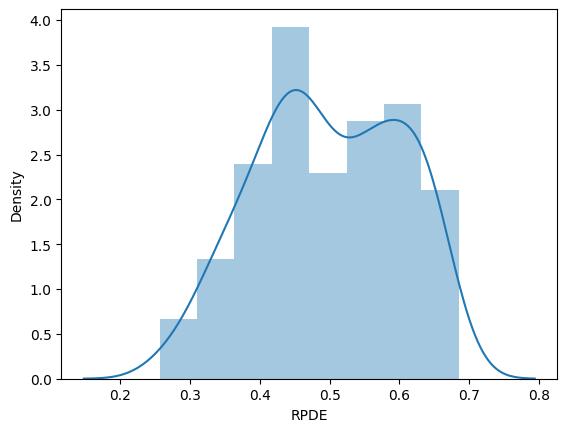

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


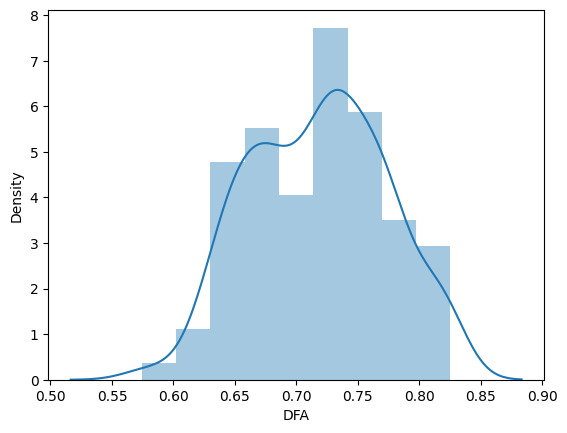

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


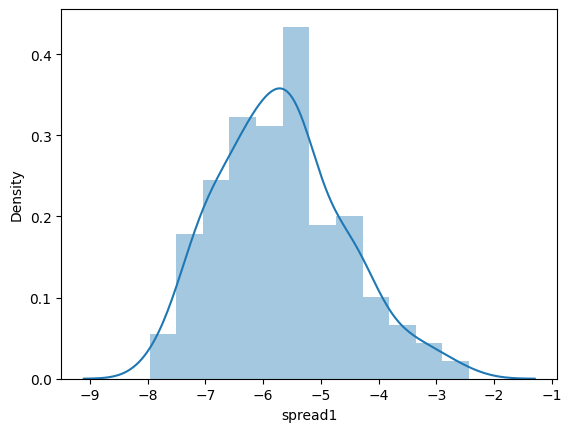

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


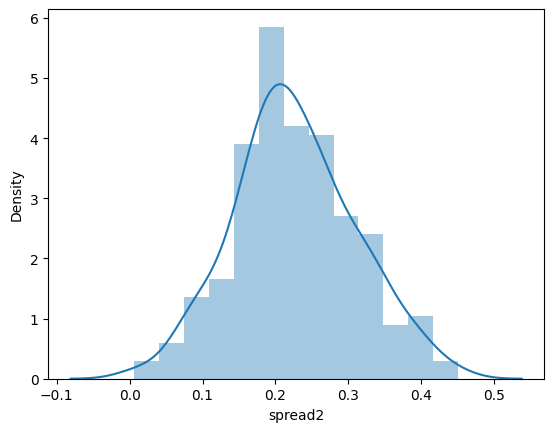

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


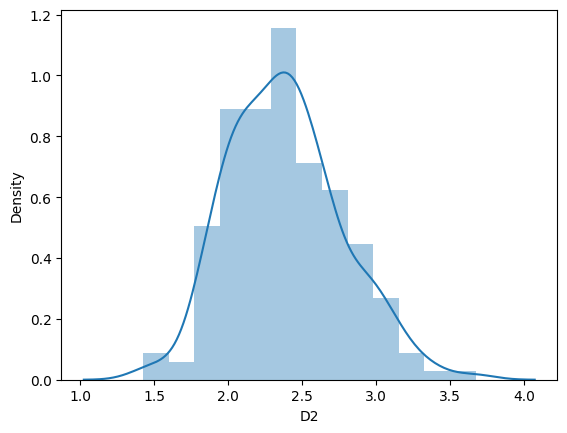

<ipython-input-11-28b94b2d1ff9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


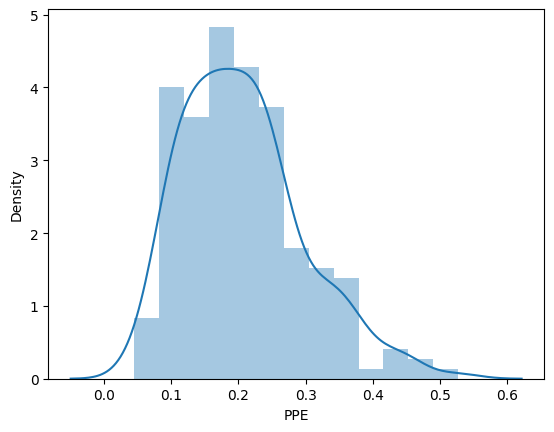

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

def distributionData(col):
  sb.distplot(data[col])
  plt.show()

for i in list(data.columns)[1:]:
  distributionData(i)

<ipython-input-12-12e4afd05069>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


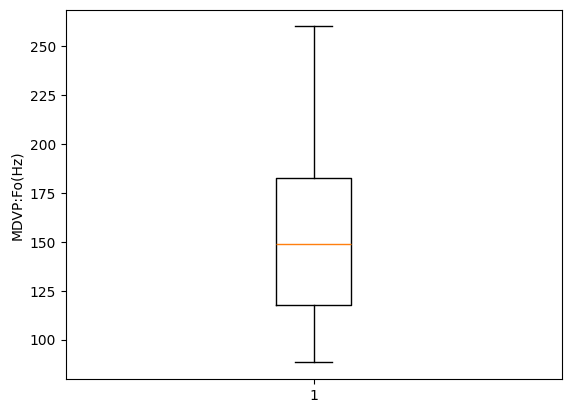

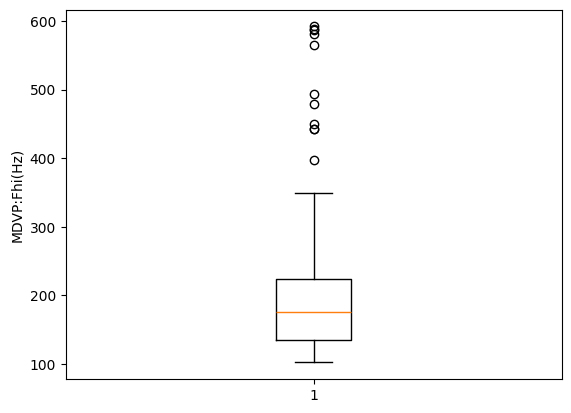

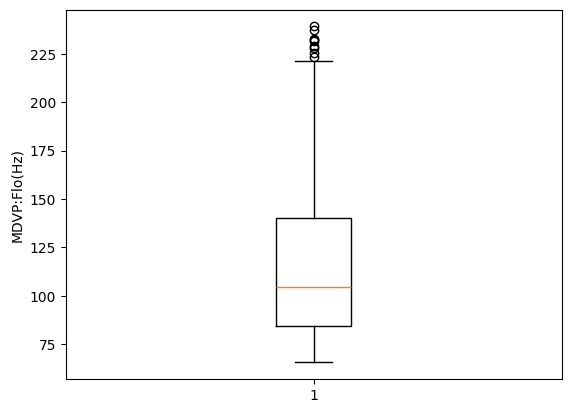

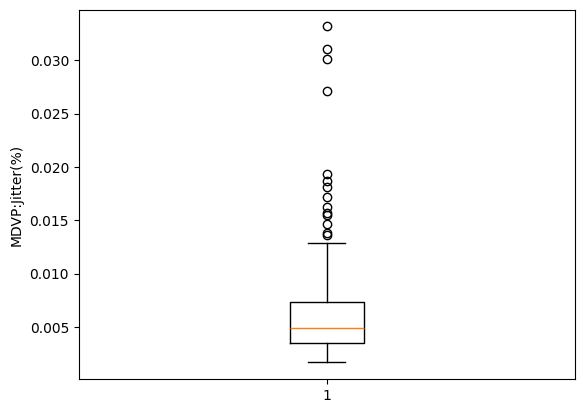

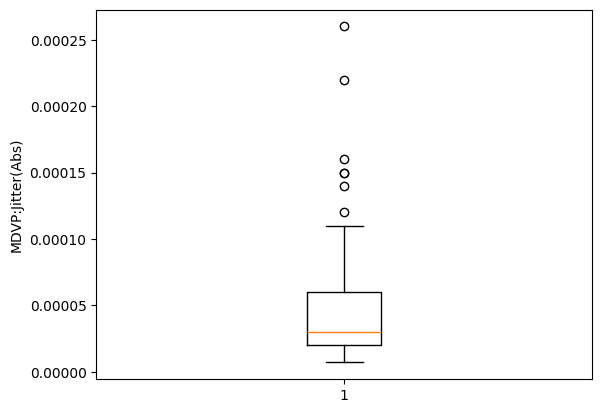

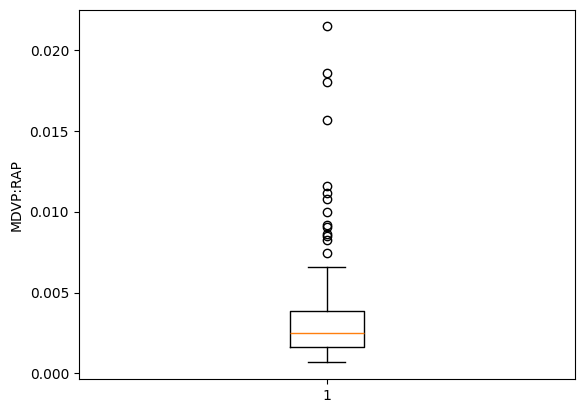

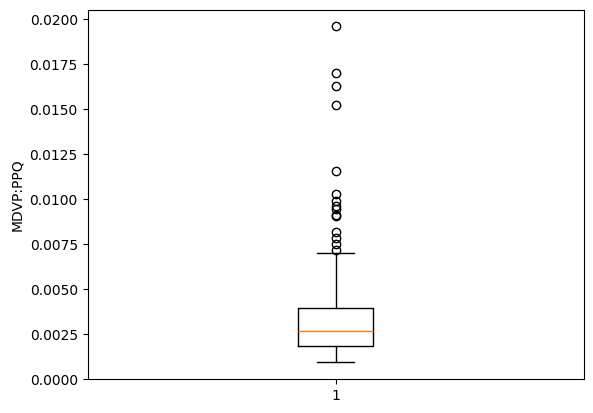

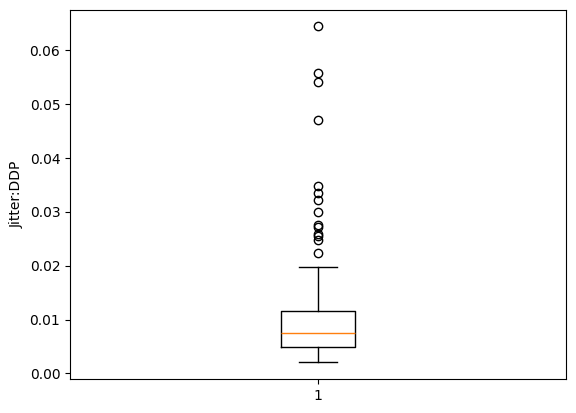

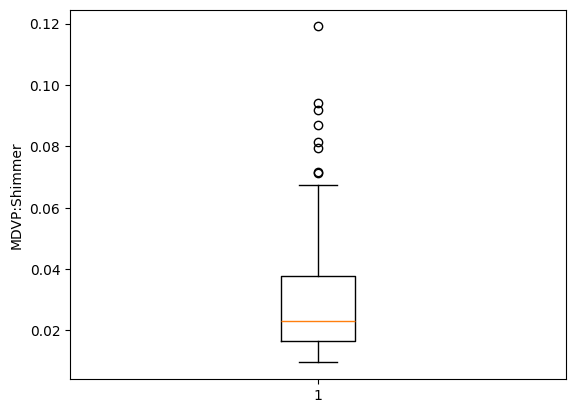

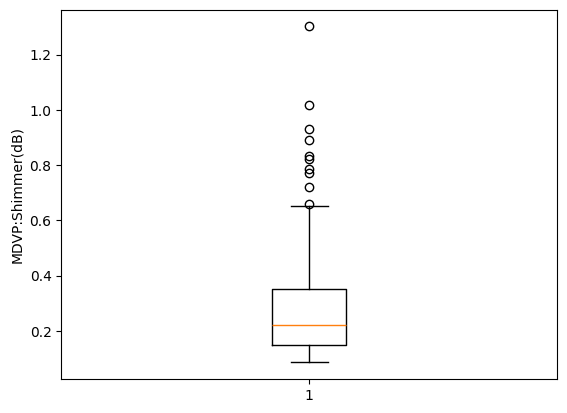

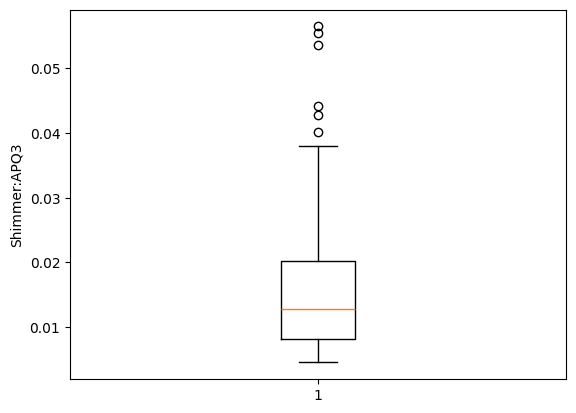

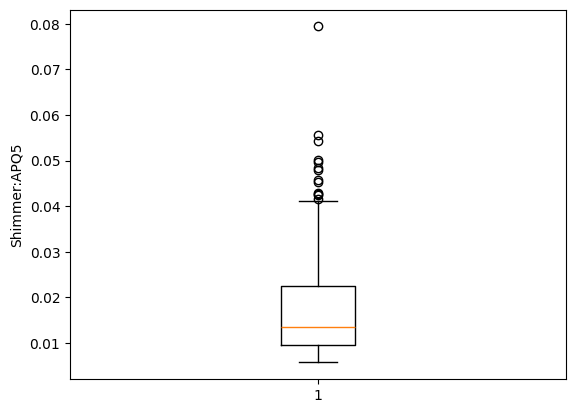

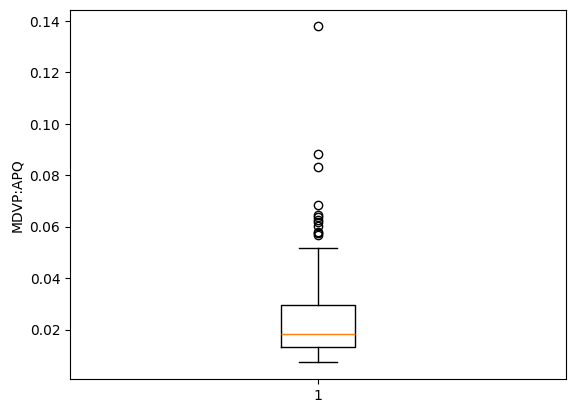

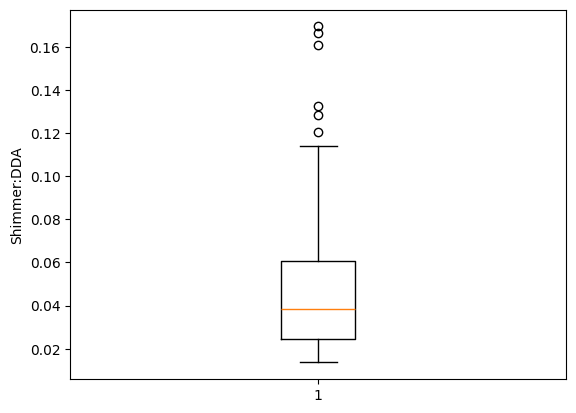

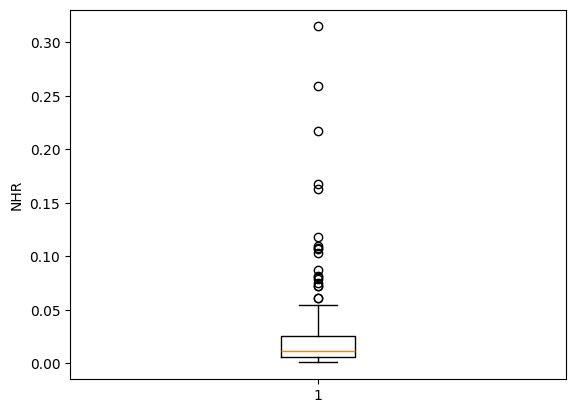

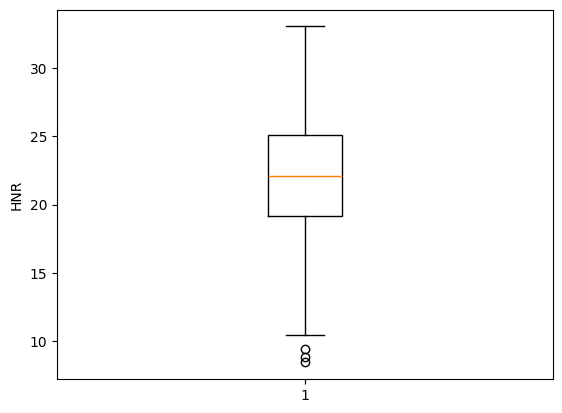

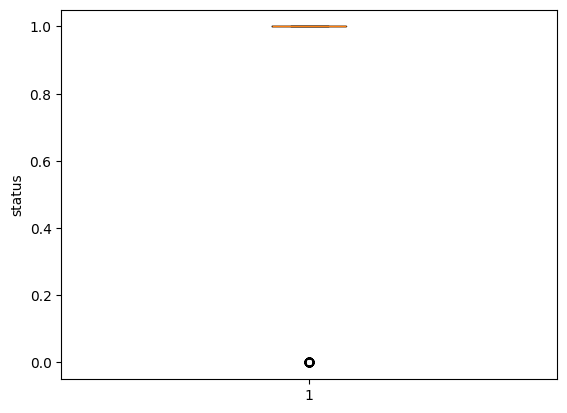

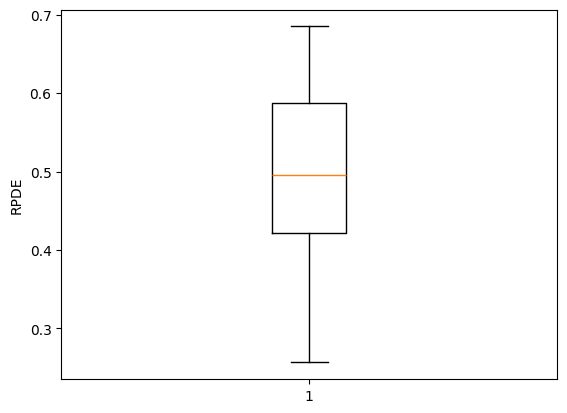

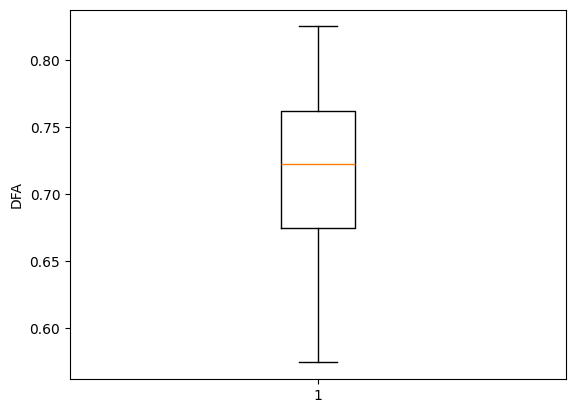

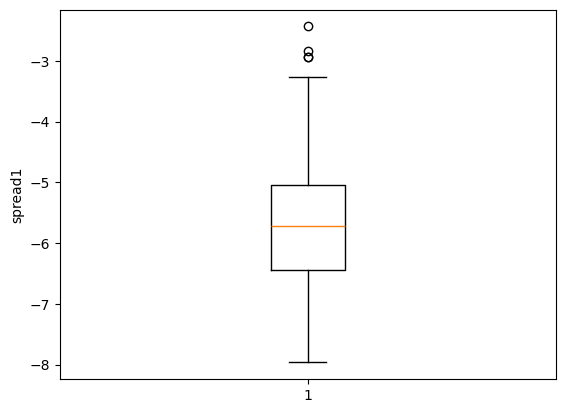

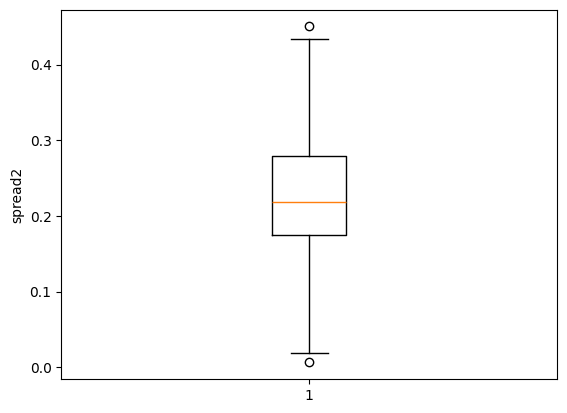

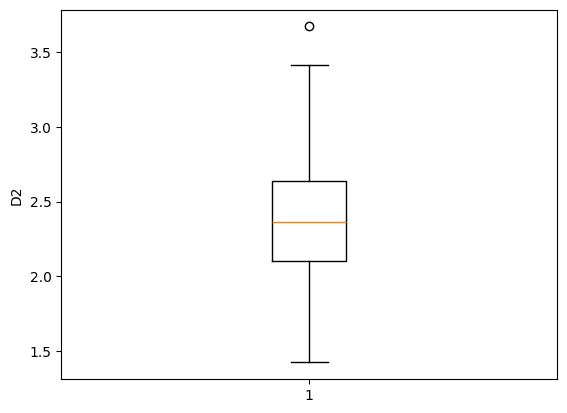

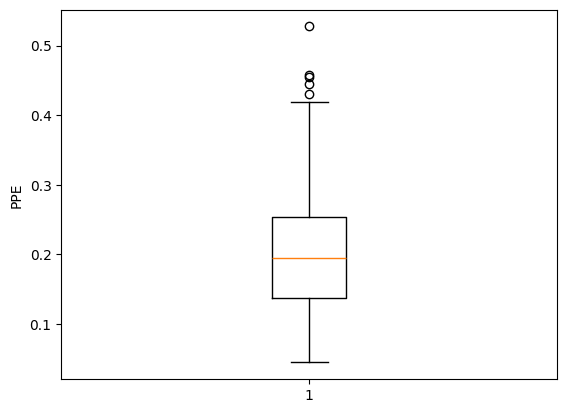

In [ ]:
for i in data.columns[1:]:
    fig, ax = plt.subplots()
    ax.boxplot(data[i])
    plt.ylabel(i)

#**BIVARIATE ANALYSIS**
The distribution plots depicts the skewedness of the features in the data.

<ipython-input-14-66044e3b0b6a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot( data[data.status == 0]['spread1'], color = 'b')
<ipython-input-14-66044e3b0b6a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot( data[data.status == 1]['spread1'], color = 'r')


<Axes: xlabel='spread1', ylabel='Density'>

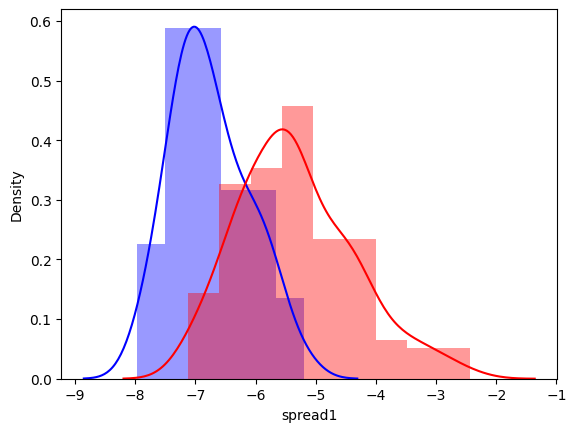

In [ ]:
sb.distplot( data[data.status == 0]['spread1'], color = 'b')
sb.distplot( data[data.status == 1]['spread1'], color = 'r')

In [ ]:
data.groupby('status').mean(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


<Axes: xlabel='status', ylabel='HNR'>

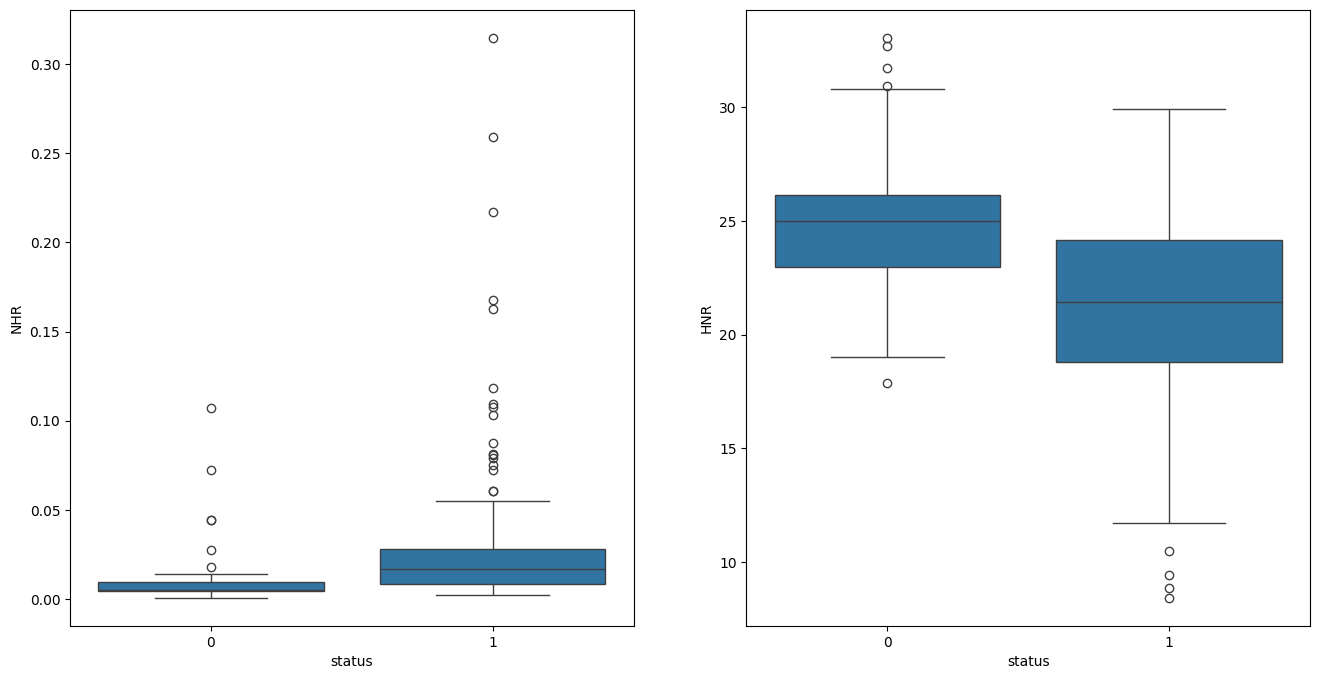

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sb.boxplot(x='status',y='NHR',data=data,ax=ax[0])
sb.boxplot(x='status',y='HNR',data=data,ax=ax[1])

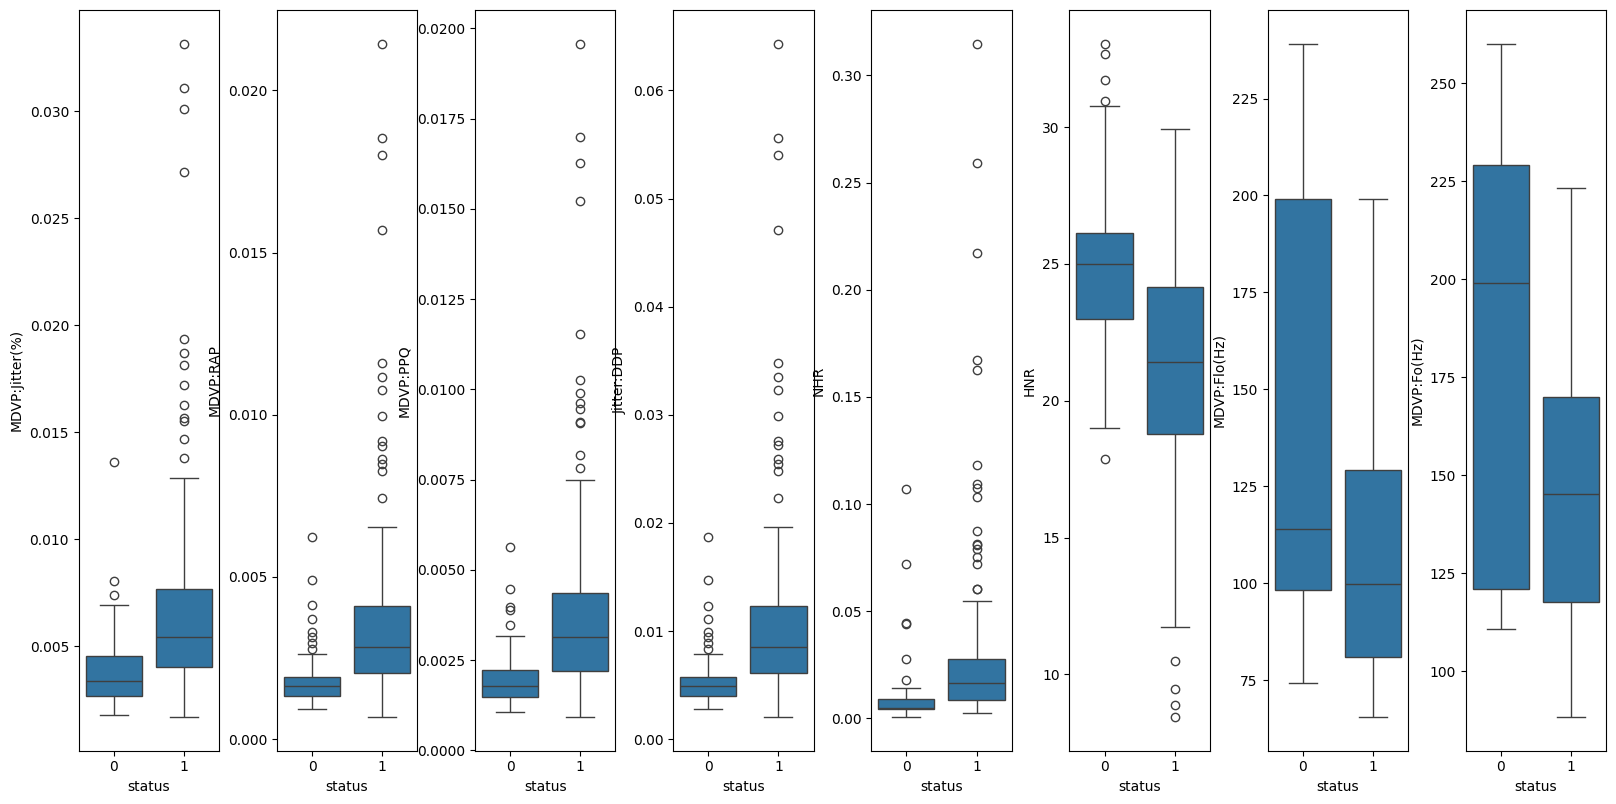

In [ ]:
cols = ["MDVP:Jitter(%)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","NHR","HNR","MDVP:Flo(Hz)","MDVP:Fo(Hz)"]
fig, axs = plt.subplots(ncols = 8,figsize=(16,8))
fig.tight_layout()
for i in range(0,len(cols)):
    sb.boxplot(x='status',y=cols[i],data=data, ax = axs[i])

In [ ]:
data["status"].value_counts()

,count
status,
1,147
0,48


In [ ]:
features=data.loc[:,data.columns!='status'].values[:,1:]
labels=data.loc[:,'status'].values
print(features,labels)

[[119.992 157.302 74.997 ... 0.266482 2.301442 0.284654]
 [122.4 148.65 113.819 ... 0.33559 2.486855 0.368674]
 [116.682 131.111 111.555 ... 0.311173 2.342259 0.332634]
 ...
 [174.688 240.005 74.287 ... 0.158453 2.679772 0.131728]
 [198.764 396.961 74.904 ... 0.207454 2.138608 0.123306]
 [214.289 260.277 77.973 ... 0.190667 2.555477 0.148569]] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


#**DATA PREPROCESSING**
##**BALANCING**

status
1    147
0     48
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


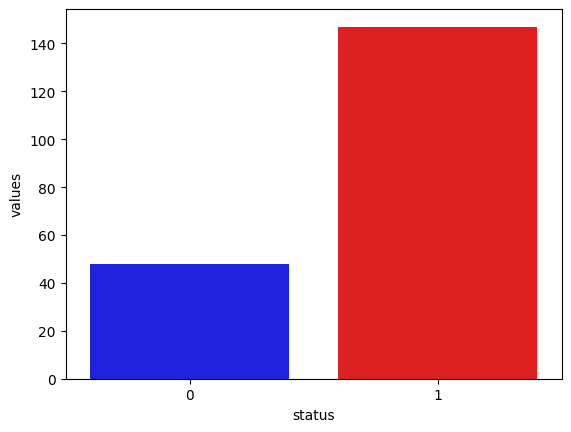

In [ ]:
# status - Health status of the subject: 1 - Parkinson's, 0 - healthy
temp = data["status"].value_counts()
print(temp)

status_graph = pd.DataFrame({"status": temp.index, "values": temp.values})
print(sb.barplot(x = "status", y = "values", data = status_graph, palette=["blue", "red"]))

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
y.value_counts()

,count
status,
1,147
0,147


<Axes: title={'center': 'Class distribution after appying SMOTE'}, xlabel='status'>

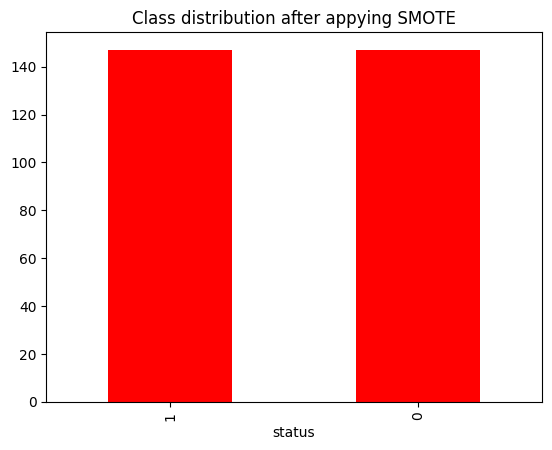

In [ ]:
pd.Series(y).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='status',color='red')

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.410545,0.633239,-0.172607,-0.419951,-0.105517,-0.150210,-0.105554,-0.155027,-0.129533,...,-0.168004,-0.137151,-0.053755,0.096740,-0.438568,-0.528403,-0.489248,-0.471481,0.125427,-0.448828
MDVP:Fhi(Hz),0.410545,1.000000,0.102106,0.086543,-0.047631,0.102393,0.090155,0.102338,-0.003423,0.036237,...,-0.016476,-0.002004,0.164787,-0.059703,-0.107875,-0.415429,-0.102775,-0.140475,0.185245,-0.105291
MDVP:Flo(Hz),0.633239,0.102106,1.000000,-0.242252,-0.364817,-0.188503,-0.193539,-0.188474,-0.219786,-0.198251,...,-0.197861,-0.217610,-0.188695,0.308760,-0.403956,-0.155655,-0.459593,-0.325104,-0.191789,-0.409814
MDVP:Jitter(%),-0.172607,0.086543,-0.242252,1.000000,0.940897,0.987586,0.973763,0.987584,0.786147,0.821233,...,0.777403,0.766888,0.922070,-0.741392,0.384822,0.065589,0.699345,0.401285,0.473085,0.722419
MDVP:Jitter(Abs),-0.419951,-0.047631,-0.364817,0.940897,1.000000,0.920918,0.901107,0.920921,0.739779,0.750038,...,0.699173,0.730114,0.851808,-0.678231,0.481049,0.160463,0.758466,0.461359,0.367261,0.768770
MDVP:RAP,-0.105517,0.102393,-0.188503,0.987586,0.920918,1.000000,0.962856,1.000000,0.782431,0.813759,...,0.762331,0.768832,0.931760,-0.733666,0.354721,0.012207,0.665853,0.329083,0.474007,0.687209
MDVP:PPQ,-0.150210,0.090155,-0.193539,0.973763,0.901107,0.962856,1.000000,0.962858,0.813277,0.854755,...,0.824439,0.781487,0.866099,-0.740785,0.362416,0.128613,0.730687,0.415557,0.458785,0.774936
Jitter:DDP,-0.105554,0.102338,-0.188474,0.987584,0.920921,1.000000,0.962858,1.000000,0.782391,0.813717,...,0.762299,0.768796,0.931784,-0.733628,0.354589,0.012174,0.665823,0.329010,0.473973,0.687197
MDVP:Shimmer,-0.155027,-0.003423,-0.219786,0.786147,0.739779,0.782431,0.813277,0.782391,1.000000,0.987895,...,0.954226,0.989123,0.725268,-0.825669,0.480072,0.123708,0.687097,0.453639,0.529508,0.719926
MDVP:Shimmer(dB),-0.129533,0.036237,-0.198251,0.821233,0.750038,0.813759,0.854755,0.813717,0.987895,1.000000,...,0.965082,0.966140,0.753798,-0.822664,0.443936,0.124867,0.680822,0.452117,0.537884,0.716046


##MULTICOLLINEARITY CHECK

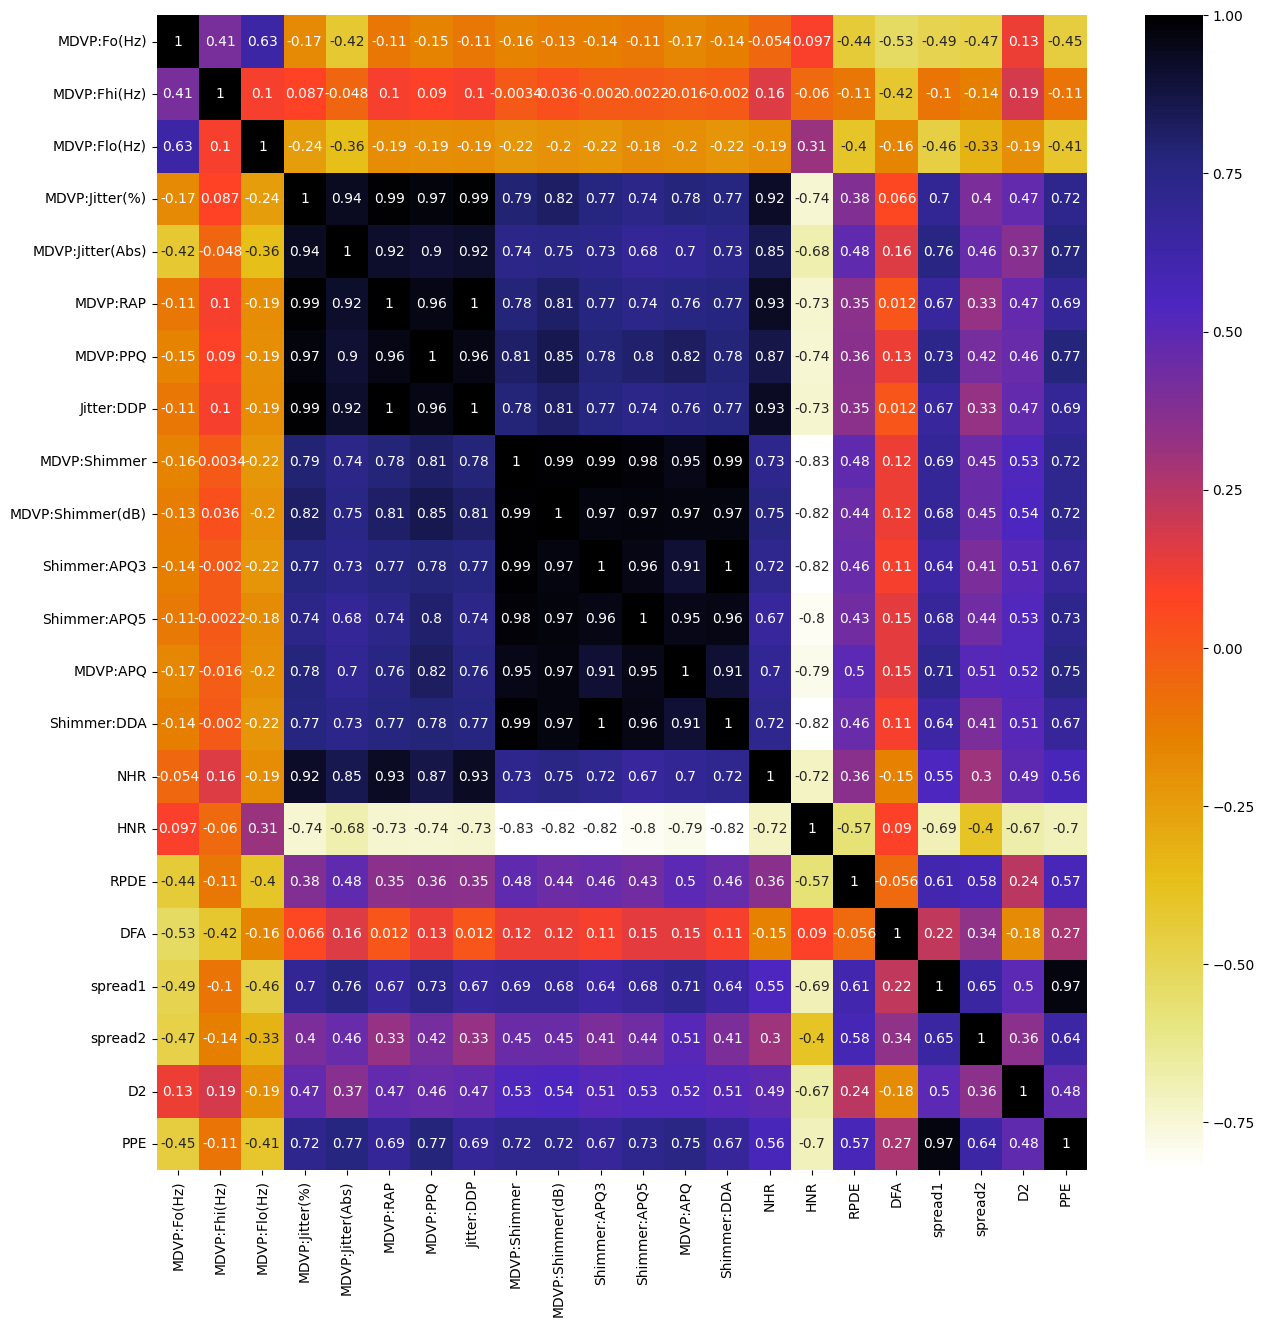

In [ ]:
#using pearson correlation
plt.figure(figsize=(15,15))
cor=X_train.corr()
sb.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(X_T,threshold):
  column_cor=set()
  corr_matrix=X_T.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        column_name=corr_matrix.columns[i]
        column_cor.add(column_name)
  return column_cor

In [ ]:
corr_features=correlation(X_train,0.90)
len(set(corr_features))

11

#DATA REDUCTION

In [ ]:
corr_features

{'Jitter:DDP',
 'MDVP:APQ',
 'MDVP:Jitter(Abs)',
 'MDVP:PPQ',
 'MDVP:RAP',
 'MDVP:Shimmer(dB)',
 'NHR',
 'PPE',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA'}

In [ ]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)
X_train
X_test

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
33,202.266000,211.604000,197.079000,0.001800,0.009540,32.684000,0.368535,0.742133,-7.695734,0.178540,1.544609
9,95.056000,120.103000,91.226000,0.005320,0.028380,21.862000,0.547037,0.798463,-5.011879,0.325996,2.432792
146,169.774000,191.759000,151.451000,0.015680,0.081430,12.359000,0.561610,0.793509,-3.297668,0.414758,3.413649
282,114.522144,119.107489,86.791150,0.003273,0.011882,24.793964,0.553313,0.660382,-6.703545,0.150150,1.913723
261,202.415483,211.591299,196.929354,0.001797,0.009547,32.743109,0.363900,0.742095,-7.739577,0.176094,1.524853
125,145.174000,198.109000,80.637000,0.007330,0.023620,18.857000,0.637518,0.735546,-5.594275,0.127950,1.765957
108,151.989000,157.339000,132.857000,0.001740,0.010240,29.928000,0.311369,0.676066,-6.739151,0.160686,2.296873
206,113.350075,130.464164,106.542454,0.003485,0.013991,26.313824,0.411225,0.757991,-6.222402,0.212947,2.131458
109,193.030000,208.900000,80.297000,0.007660,0.030440,21.934000,0.497554,0.740539,-5.845099,0.278679,2.608749
42,237.226000,247.326000,225.227000,0.002980,0.017520,22.736000,0.305062,0.654172,-7.310550,0.098648,2.416838


In [ ]:
y_train
y_test

,status
33,0
9,1
146,1
282,0
261,0
125,1
108,1
206,0
109,1
42,0


#**FEATURE SCALING**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**MODEL TRAINING AND IMPLEMENTATION**
#**Training by XGBoost**

In [ ]:
from xgboost import XGBClassifier
xb = XGBClassifier().fit(X_train, y_train)
predictions = xb.predict(X_test)

cm = confusion_matrix(y_test, predictions)
print(cm)
a1=accuracy_score(y_test, predictions) * 100
a1

[[30  0]
 [ 1 28]]


98.30508474576271

In [ ]:
a=f1_score(y_test, predictions)
a

0.9824561403508771

In [ ]:
X_train[0]

array([-0.32047079, -0.46658531,  0.35203087, -0.34121752, -0.44985134,
        0.01659448, -0.70254823,  1.11329245,  0.34720876,  0.15942007,
        1.01803117])

#**Training by KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
a2=accuracy_score(y_test, y_pred)*100
a2

[[30  0]
 [ 1 28]]


98.30508474576271

In [ ]:
b=f1_score(y_test, y_pred)
b

0.9824561403508771

#**Training by kernal SVM**

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
a3=accuracy_score(y_test, y_pred)*100
a3

[[30  0]
 [ 2 27]]


96.61016949152543

In [ ]:
c=f1_score(y_test, y_pred)
c

0.9642857142857143

#**Training by Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
a4=accuracy_score(y_test, y_pred) * 100
a4

[[30  0]
 [ 1 28]]


98.30508474576271

In [ ]:
d=f1_score(y_test, y_pred)
d

0.9824561403508771

#**Training by Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
a5=accuracy_score(y_test, y_pred)*100
a5

[[29  1]
 [ 1 28]]


96.61016949152543

In [ ]:
e=f1_score(y_test, y_pred)
e

0.9655172413793104

#**Training by Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression # Importing the LogisticRegression class

# It is generally recommended to use separate variable names.
# Consider using logreg_classifier instead of reusing 'classifier'
logreg_classifier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
logreg_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
a6=accuracy_score(y_test, y_pred)*100
a6

[[29  1]
 [ 1 28]]


96.61016949152543

In [ ]:
f=f1_score(y_test, y_pred)
f

0.9655172413793104

#**Training by Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
a7=accuracy_score(y_test, y_pred)*100
a7

[[29  1]
 [ 4 25]]


91.52542372881356

In [ ]:
g=f1_score(y_test, y_pred)
g

0.9090909090909091

#**Training by SVM**

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
a8=accuracy_score(y_test, y_pred)*100
a8

[[28  2]
 [ 4 25]]


89.83050847457628

In [ ]:
h=f1_score(y_test, y_pred)
h

0.8928571428571429

#**Joint accuracy**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimator_list = [
    ('knn',knn),
    ('svm',svm),
    ('rf',rf),
    ('xgb',xb) ]
# ]

stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)
stack_model.fit(X_train, y_train)
y_pred=stack_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
aa=accuracy_score(y_test, y_pred) * 100
aa

[[29  1]
 [ 0 29]]


98.30508474576271

In [ ]:
arr=sc.transform([[155.078,163.736,144.148,0.00168,0.01064,29.746,0.334171,0.677930,-6.981201,0.184550,2.129924]])
print(stack_model.predict(arr))
arr

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.1757138 , -0.43752498,  0.39594916, -0.8493315 , -0.90066762,
         1.62674997, -1.46171197, -0.64278876, -0.87760954, -0.24184709,
        -0.5573928 ]])

#**Graph of Accuracy & F1 score of all algo**

In [ ]:
y_axis=np.array([a1,a2,a3,a4,a5,a6,a7,a8])
x_axis=np.array(["Xgboost","KNN","Kernel Svm","Rand Forest","Decison Tree","Logistic","Naive Bayes","SVM"])

Text(0.5, 1.0, 'ACCURACY of different Classification Algorithms')

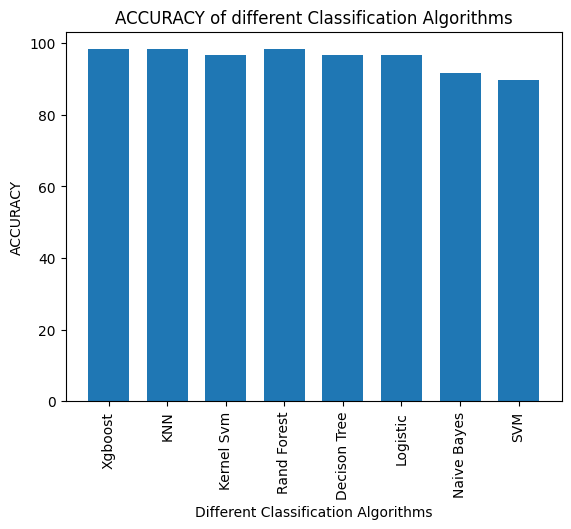

In [ ]:
from matplotlib import pyplot as plt
plt.bar(x_axis,y_axis,width=.7);
plt.xticks(rotation = 90)
plt.xlabel("Different Classification Algorithms")
plt.ylabel("ACCURACY")
plt.title("ACCURACY of different Classification Algorithms")

In [ ]:
y_axis=np.array([a,b,c,d,e,f,g,h])
x_axis=np.array(["Xgboost","KNN","Kernel Svm","Rand Forest","Decison Tree","Logistic","Naive Bayes","SVM"])

Text(0.5, 1.0, 'F1-Score of different Classification Algorithms')

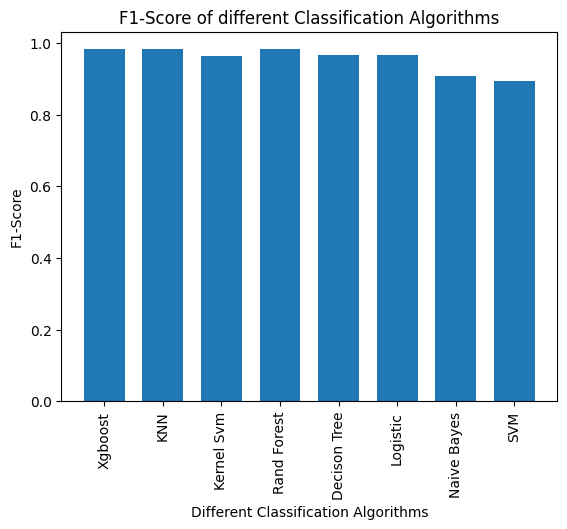

In [ ]:
from matplotlib import pyplot as plt
plt.bar(x_axis,y_axis,width=.7);
plt.xticks(rotation = 90)
plt.xlabel("Different Classification Algorithms")
plt.ylabel("F1-Score")
plt.title("F1-Score of different Classification Algorithms")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'F1-Score of different Classification Algorithms')

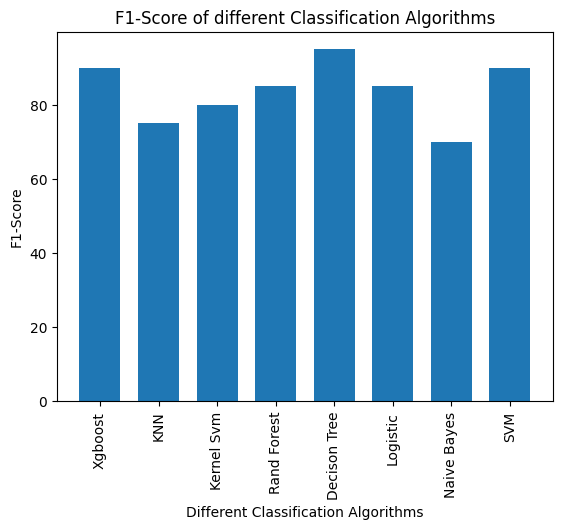

In [ ]:
xb = XGBClassifier().fit(X_train_b, y_train_b)
predictions = xb.predict(X_test_b)
a1=accuracy_score(y_test_b, predictions) * 100

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_b, y_train_b)
y_pred = knn.predict(X_test_b)
a2=accuracy_score(y_test_b, y_pred) * 100

svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train_b, y_train_b)
y_pred = svm.predict(X_test_b)
a3=accuracy_score(y_test_b, y_pred)*100

rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train_b, y_train_b)
y_pred = rf.predict(X_test_b)
a4=accuracy_score(y_test_b, y_pred) * 100

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_b, y_train_b)
y_pred = classifier.predict(X_test_b)
a5=accuracy_score(y_test_b, y_pred)*100

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_b, y_train_b)
y_pred = classifier.predict(X_test_b)
a6=accuracy_score(y_test_b, y_pred)*100



classifier = GaussianNB()
classifier.fit(X_train_b, y_train_b)
y_pred = classifier.predict(X_test_b)
a7=accuracy_score(y_test_b, y_pred)*100


classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_b, y_train_b)
y_pred = classifier.predict(X_test_b)
a8=accuracy_score(y_test_b, y_pred)*100
y_axis=np.array([a1,a2,a3,a4,a5,a6,a7,a8])
x_axis=np.array(["Xgboost","KNN","Kernel Svm","Rand Forest","Decison Tree","Logistic","Naive Bayes","SVM"])
from matplotlib import pyplot as plt
plt.bar(x_axis,y_axis,width=.7);
plt.xticks(rotation = 90)
plt.xlabel("Different Classification Algorithms")
plt.ylabel("F1-Score")
plt.title("F1-Score of different Classification Algorithms")

#**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.model_selection import KFold
import itertools

In [ ]:
# Range for the value of fold
folds = range(2,21)

models = np.array([KNeighborsClassifier(),SVC(),RandomForestClassifier(),XGBClassifier(),DecisionTreeClassifier(),LogisticRegression(),GaussianNB(),SVC()])
temp = np.array(["KNN","Kernel Svm","Random Forest","Xgboost","Decision Tree","Logistic","Naive Bayes","SVM"])

In [ ]:
 # evaluate each k value
for i, name_of_algo in zip(models, temp):
    print("")
    print(name_of_algo)
    print("")

    for k in folds:
      # define the test condition
      cv = KFold(n_splits=k, shuffle=True, random_state=10)

      model = i

      if name_of_algo == "Kernel Svm":
        model = SVC(kernel = 'rbf')

      if name_of_algo == "SVM":
        model = SVC(kernel = 'linear')

      if name_of_algo == "Logistic":
        model = LogisticRegression(solver='lbfgs', max_iter=1000)

      scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

      # record mean and min/max of each set of results
      k_mean, k_min, k_max = mean(scores), scores.min(), scores.max()

      # report performance
      print('-> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))


KNN

-> folds=2, accuracy=0.830 (0.830,0.830)
-> folds=3, accuracy=0.840 (0.816,0.857)
-> folds=4, accuracy=0.881 (0.838,0.932)
-> folds=5, accuracy=0.857 (0.828,0.881)
-> folds=6, accuracy=0.878 (0.837,0.939)
-> folds=7, accuracy=0.861 (0.833,0.929)
-> folds=8, accuracy=0.874 (0.806,0.946)
-> folds=9, accuracy=0.867 (0.788,0.939)
-> folds=10, accuracy=0.878 (0.793,0.966)
-> folds=11, accuracy=0.864 (0.808,0.963)
-> folds=12, accuracy=0.874 (0.792,0.960)
-> folds=13, accuracy=0.867 (0.773,0.957)
-> folds=14, accuracy=0.874 (0.762,0.952)
-> folds=15, accuracy=0.871 (0.750,0.950)
-> folds=16, accuracy=0.874 (0.737,0.947)
-> folds=17, accuracy=0.868 (0.722,0.944)
-> folds=18, accuracy=0.878 (0.765,1.000)
-> folds=19, accuracy=0.881 (0.750,0.938)
-> folds=20, accuracy=0.880 (0.733,1.000)

Kernel Svm

-> folds=2, accuracy=0.639 (0.599,0.680)
-> folds=3, accuracy=0.653 (0.561,0.724)
-> folds=4, accuracy=0.663 (0.581,0.712)
-> folds=5, accuracy=0.664 (0.610,0.741)
-> folds=6, accuracy=0.667 

In [ ]:
cv2 = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=18)
cv2 = np.mean(cv2)
cv2

np.float64(0.8298611111111112)

In [ ]:
model = SVC(kernel = 'rbf')
cv3 = cross_val_score(model, X, y, scoring='accuracy', cv=8)
cv3 = np.mean(cv3)
cv3

np.float64(0.6695758258258259)

In [ ]:
cv4 = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=8)
cv4 = np.mean(cv4)
cv4

np.float64(0.9083145645645646)

In [ ]:
cv1 = cross_val_score(XGBClassifier(), X, y, scoring='accuracy', cv=18)
cv1 = np.mean(cv1)
cv1

np.float64(0.945874183006536)

In [ ]:
cv5 = cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=19)
cv5 = np.mean(cv5)
cv5

np.float64(0.8774122807017545)

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
cv6 = cross_val_score(model, X, y, scoring='accuracy', cv=10)
cv6 = np.mean(cv6)
cv6

np.float64(0.7786206896551724)

In [ ]:
cv7 = cross_val_score(GaussianNB(), X, y, scoring='accuracy',cv=12)
cv7 = np.mean(cv7)
cv7

np.float64(0.7916666666666666)

In [ ]:
model = SVC(kernel = 'linear')
cv8 = cross_val_score(model, X, y, scoring='accuracy', cv=5)
cv8 = np.mean(cv8)
cv8

np.float64(0.8131502045587375)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)
print(X_train)

(294, 22) (235, 11) (59, 11)
[[-0.32047079 -0.46658531  0.35203087 ...  0.34720876  0.15942007
   1.01803117]
 [ 0.74718404  0.48852895 -0.82988145 ... -0.32370793 -0.81214063
   1.2140314 ]
 [ 0.7539823   0.15167373 -0.69391883 ...  0.31582176 -0.4956466
   1.60104826]
 ...
 [-0.1757138  -0.43752498  0.39594916 ... -0.87760954 -0.24184709
  -0.5573928 ]
 [ 0.76130528  0.04191653  1.388626   ... -1.30734163 -0.34818905
  -1.28425544]
 [-0.52259671  4.18535226 -1.19718152 ...  2.68202117  0.8494997
   1.05168161]]


In [ ]:
y_axis = np.array([cv1,cv2,cv3,cv4,cv5,cv6,cv7,cv8])
x_axis = np.array(["Xgboost","KNN","Kernel Svm","Rand Forest","Decison Tree","Logistic","Naive Bayes","SVM"])

Text(0.5, 1.0, 'Accuracy of different Classification Algorithms After Cross Validation')

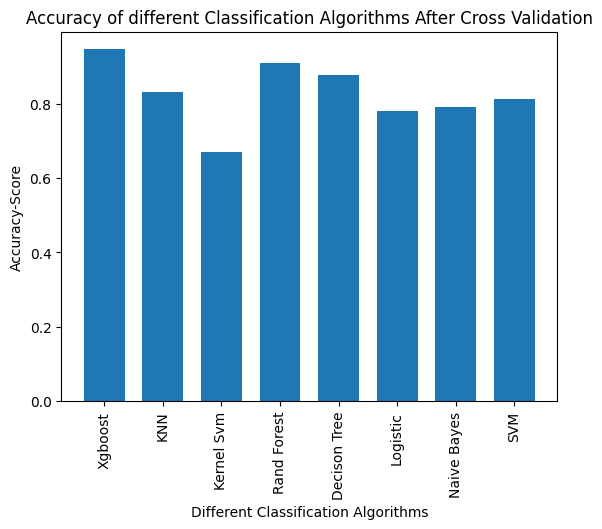

In [ ]:
from matplotlib import pyplot as plt
plt.bar(x_axis,y_axis,width=0.7);
plt.xticks(rotation = 90)

plt.xlabel("Different Classification Algorithms")
plt.ylabel("Accuracy-Score")
plt.title("Accuracy of different Classification Algorithms After Cross Validation")

Text(0.5, 1.0, 'Accuracy of different Classification Algorithms After Cross Validation')

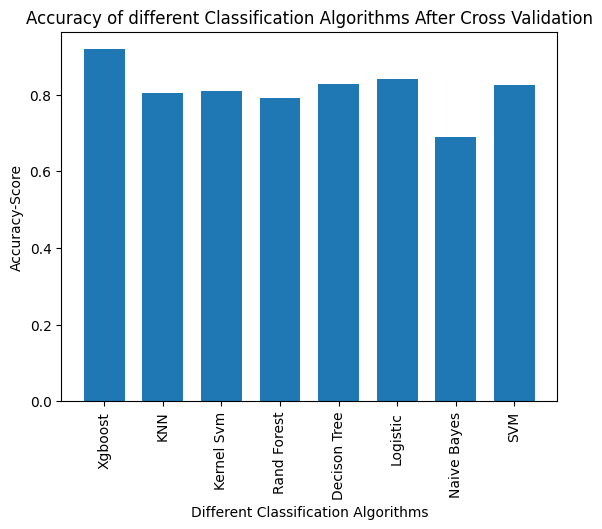

In [ ]:
cv1 = cross_val_score(XGBClassifier(), X_b, y_b, scoring='accuracy', cv=18)
cv1 = np.mean(cv1)
cv1

cv2 = cross_val_score(KNeighborsClassifier(), X_b, y_b, scoring='accuracy', cv=18)
cv2 = np.mean(cv2)
cv2

model = SVC(kernel = 'rbf')
cv3 = cross_val_score(model, X_b, y_b, scoring='accuracy', cv=8)
cv3 = np.mean(cv3)
cv3

cv4 = cross_val_score(RandomForestClassifier(), X_b, y_b, scoring='accuracy', cv=8)
cv4 = np.mean(cv4)
cv4

cv5 = cross_val_score(DecisionTreeClassifier(), X_b, y_b, scoring='accuracy', cv=19)
cv5 = np.mean(cv5)
cv5

model = LogisticRegression(solver='lbfgs', max_iter=1000)
cv6 = cross_val_score(model, X_b, y_b, scoring='accuracy', cv=10)
cv6 = np.mean(cv6)
cv6

cv7 = cross_val_score(GaussianNB(), X_b, y_b, scoring='accuracy',cv=12)
cv7 = np.mean(cv7)
cv7

model = SVC(kernel = 'linear')
cv8 = cross_val_score(model, X_b, y_b, scoring='accuracy', cv=5)
cv8 = np.mean(cv8)
cv8

y_axis = np.array([cv1,cv2,cv3,cv4,cv5,cv6,cv7,cv8])
x_axis = np.array(["Xgboost","KNN","Kernel Svm","Rand Forest","Decison Tree","Logistic","Naive Bayes","SVM"])

from matplotlib import pyplot as plt
plt.bar(x_axis,y_axis,width=0.7);
plt.xticks(rotation = 90)

plt.xlabel("Different Classification Algorithms")
plt.ylabel("Accuracy-Score")
plt.title("Accuracy of different Classification Algorithms After Cross Validation")

#**ENSEMBLING TECHNIQUE**
An "ensemble technique" in machine learning is a method that combines predictions from multiple individual models (called "base learners") to create a more accurate overall prediction, essentially leveraging the strengths of different models to improve performance compared to using just one model alone.

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Display basic info
print(data.head())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [ ]:
# Split data into features (X) and target (y)
X = data.drop(columns=['status'])  # 'status' is the target variable
y = data['status']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Split data into features (X) and target (y)
X = data.drop(columns=['status', 'name'])  # Remove 'status' and 'name' columns
y = data['status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization (Scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**SVM MODEL**

In [ ]:
# ---------------- ORIGINAL MODEL (FROM GITHUB) ----------------
from sklearn.svm import SVC

In [ ]:
# Initialize and train original model
original_model = SVC(kernel='linear', random_state=42)
original_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predictions using original model
y_pred_original = original_model.predict(X_test)

In [ ]:
# Evaluate original model
print("Original Model Accuracy:", accuracy_score(y_test, y_pred_original))
print("Original Model Report:\n", classification_report(y_test, y_pred_original))

Original Model Accuracy: 0.8717948717948718
Original Model Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



#**ENSEMBLE MODELS**


In [ ]:
# Import ensemble classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#**RANDOM FOREST(BAGGING)**

In [ ]:
# 1️⃣ Random Forest (Bagging)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9487179487179487


#**ADABOOST(BOOSTING)**

In [ ]:
# 2️⃣ AdaBoost (Boosting)
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42) # Changed 'base_estimator' to 'estimator'
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_adaboost))

AdaBoost Accuracy: 0.8461538461538461


#**GRADIENT BOOSTING(BOOSTING)**

In [ ]:
# 3️⃣ Gradient Boosting (Boosting)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9487179487179487


#**STACKING**

In [ ]:
# 4️⃣ Stacking Classifier
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]
meta_learner = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stacking))

Stacking Classifier Accuracy: 0.9487179487179487


#**SOFT VOTING**

In [ ]:
# 5️⃣ Voting Classifier (Soft Voting)
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('adaboost', adaboost_model)
], voting='soft')
voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.9487179487179487


#**CONFUSION MATRICES**

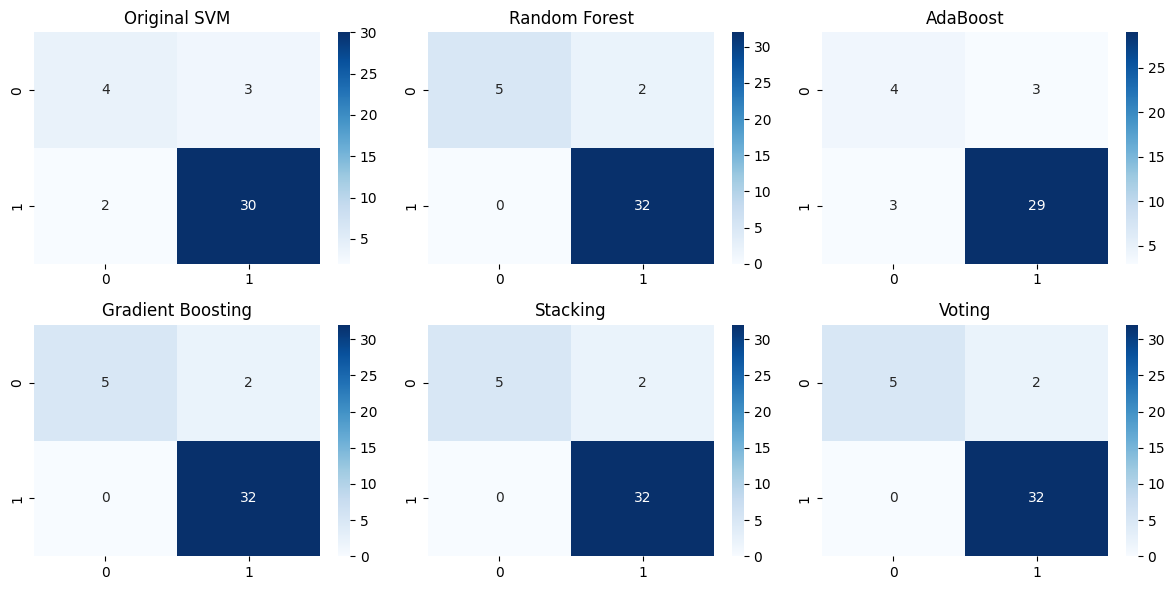

In [ ]:
plt.figure(figsize=(12, 6))

models = [
    ('Original SVM', y_pred_original),
    ('Random Forest', y_pred_rf),
    ('AdaBoost', y_pred_adaboost),
    ('Gradient Boosting', y_pred_gb),
    ('Stacking', y_pred_stacking),
    ('Voting', y_pred_voting)
]

for i, (name, y_pred) in enumerate(models):
    plt.subplot(2, 3, i+1)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(name)

plt.tight_layout()
plt.show()

#**DEFINE MODELS**

In [ ]:
# Define models
models = {
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Stacking": StackingClassifier(estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ], final_estimator=LogisticRegression())
}

#**TRAIN & EVALUATE MODELS**

In [ ]:
# Train & evaluate models
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)


#**PLOT COMPARISION**

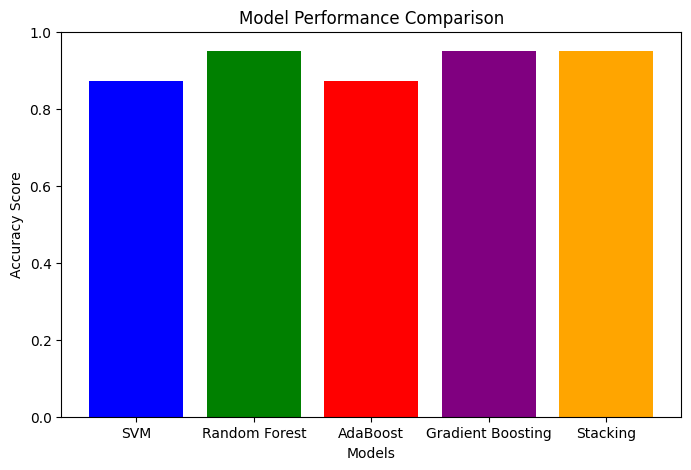

In [ ]:
# Plot comparison bar graph
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()